<a href="https://colab.research.google.com/github/xuezzou/Rebuild-My-Professor/blob/main/Tags-Prediction/BaseModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess data set


load dataset from drive. Take only useful columns. And remove rows with no tags at all.

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Rebuild\ my\ Professor
%cd data/Ratings/
!ls

/content/drive/.shortcut-targets-by-id/15wGLUvjiGtFXMZ0XzpDYeSH1XEqWjUBB/Rebuild my Professor
/content/drive/.shortcut-targets-by-id/15wGLUvjiGtFXMZ0XzpDYeSH1XEqWjUBB/Rebuild my Professor/data/Ratings
1003.csv  1100.csv  1255.csv  1381.csv	353.csv   60.csv      927.csv
1008.csv  1101.csv  1256.csv  1402.csv	355.csv   675.csv     953.csv
1040.csv  1112.csv  1270.csv  148.csv	361.csv   685.csv     958.csv
1041.csv  1115.csv  1277.csv  1513.csv	370.csv   685.gsheet  960.csv
1072.csv  1130.csv  129.csv   1530.csv	399.csv   696.csv     971.csv
1073.csv  1147.csv  1325.csv  1576.csv	4002.csv  709.csv     982.csv
1074.csv  1222.csv  1330.csv  181.csv	421.csv   724.csv     992.csv
1075.csv  1223.csv  1331.csv  186.csv	440.csv   758.csv     merged.csv
1076.csv  122.csv   1339.csv  242.csv	464.csv   759.csv     model_plot4a.png
1077.csv  1232.csv  1340.csv  269.csv	4767.csv  780.csv     model_plot4b.png
1078.csv  1236.csv  1349.csv  274.csv	509.csv   783.csv     similar_words.png
1079.csv  1237.

In [6]:
df1=pd.read_csv('696.csv', lineterminator='\n')
df2=pd.read_csv('269.csv', lineterminator='\n')
df1.head()

,Unnamed: 0,attendance,clarityColor,easyColor,helpColor,helpCount,id,notHelpCount,onlineClass,quality,rClarity,rClass,rComments,rDate,rEasy,rEasyString,rErrorMsg,rHelpful,rInterest,rOverall,rOverallString,rStatus,rTextBookUse,rTimestamp,rWouldTakeAgain,sId,takenForCredit,teacher,teacherGrade,teacherRatingTags,unUsefulGrouping,usefulGrouping,tid
0,0,NaN,good,average,good,0,28200607,0,NaN,awesome,5,ARAB4800,One of my favorite classes. Topics covered are...,05/03/2017,3.0,3.0,NaN,5,NaN,5.0,5.0,1,Yes,1493828705000,Yes,696,Yes,NaN,NaN,[],people,people,1268571
1,1,NaN,good,average,good,0,28098606,0,NaN,awesome,5,ARAB4800,I love this course! I'm from the Middle East a...,04/21/2017,3.0,3.0,NaN,5,NaN,5.0,5.0,1,Yes,1492789990000,Yes,696,Yes,NaN,A,"['Respected', 'Caring', 'Amazing lectures']",people,people,1268571
2,2,NaN,good,average,good,0,23934570,0,NaN,good,4,READINGSLIT,Just finished semester with him. Really enjoye...,12/03/2014,3.0,3.0,NaN,4,Really into it,4.0,4.0,1,Yes,1417614372000,Yes,696,Yes,NaN,A,"['Caring', 'Respected']",people,people,1268571
3,3,NaN,good,average,good,0,23662378,0,NaN,good,4,ANTHOLOGYLIT,"I thought the lectures were great, and he make...",10/16/2014,3.0,3.0,NaN,4,Really into it,4.0,4.0,1,Yes,1413470909000,Yes,696,Yes,NaN,NaN,"['Respected', 'Amazing lectures']",people,people,1268571
4,4,NaN,good,average,good,0,23625812,1,NaN,awesome,5,ANTHOLOGY4800,Really nice guy and great professor. Makes the...,10/02/2014,3.0,3.0,NaN,4,Really into it,4.5,4.5,1,Yes,1412265058000,NaN,696,Yes,NaN,NaN,"['Inspirational', 'Respected', 'Caring']",person,people,1268571


In [7]:
df1=df1.loc[:,['rComments','teacherRatingTags']]
df2=df2.loc[:,['rComments','teacherRatingTags']]
df1

,rComments,teacherRatingTags
0,One of my favorite classes. Topics covered are...,[]
1,I love this course! I'm from the Middle East a...,"['Respected', 'Caring', 'Amazing lectures']"
2,Just finished semester with him. Really enjoye...,"['Caring', 'Respected']"
3,"I thought the lectures were great, and he make...","['Respected', 'Amazing lectures']"
4,Really nice guy and great professor. Makes the...,"['Inspirational', 'Respected', 'Caring']"
...,...,...
24577,Had him spring2020 and it was the easiest clas...,"['Lecture heavy', 'Graded by few things', 'Cle..."
24578,Very inconsiderate and unnecessarily difficult...,"['Graded by few things', 'Tough grader']"
24579,no textbook required which is nice but class g...,[]
24580,Course is graded on three 20 q multiple choice...,"['Lecture heavy', 'Graded by few things']"


In [8]:
df1 = df1[df1['teacherRatingTags'] != '[]']
df2 = df2[df2['teacherRatingTags'] != '[]']


# Preprocess the tags

In [9]:
# first convert string literals of tag names
df_tags=df1
import ast 
df_tags['teacherRatingTags'] = df_tags['teacherRatingTags'].apply(ast.literal_eval)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
# One-hot encoding of multilabel
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_tags = pd.DataFrame(mlb.fit_transform(df_tags['teacherRatingTags']),columns=mlb.classes_)
print(df_tags)

      Accessible outside class  Amazing lectures  ...  Test heavy  Tough grader
0                            0                 1  ...           0             0
1                            0                 0  ...           0             0
2                            0                 1  ...           0             0
3                            0                 0  ...           0             0
4                            0                 0  ...           0             0
...                        ...               ...  ...         ...           ...
8310                         0                 0  ...           1             0
8311                         0                 0  ...           0             0
8312                         0                 0  ...           0             1
8313                         0                 0  ...           0             0
8314                         0                 1  ...           0             0

[8315 rows x 20 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


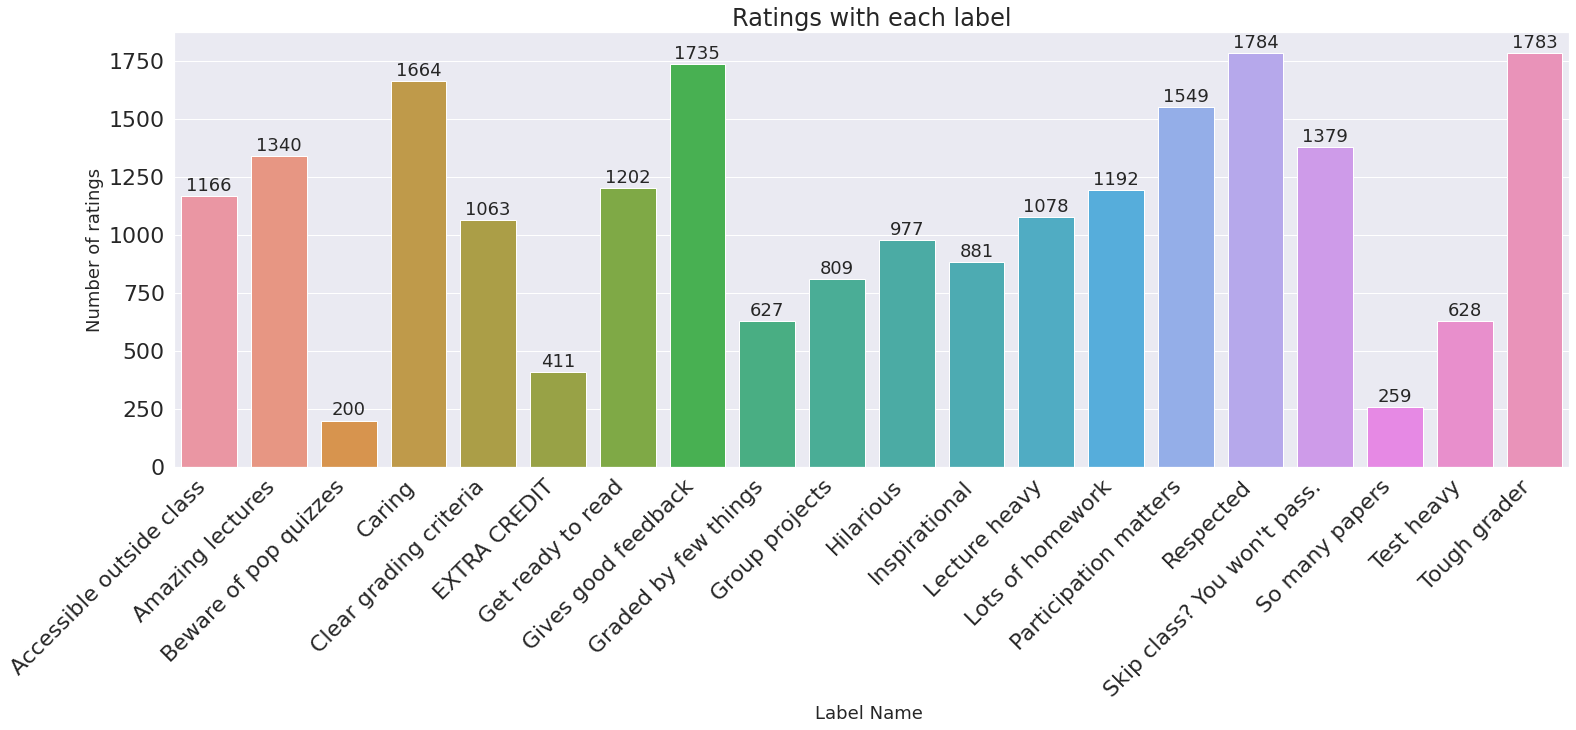

In [13]:
# plot the number of reviews for each tag
categories=list(df_tags.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(25,8))
labels=df_tags.iloc[:,:].sum().values #counts
ax= sns.barplot(categories, labels)
plt.title("Ratings with each label", fontsize=24)
plt.ylabel('Number of ratings', fontsize=18)
plt.xlabel('Label Name ', fontsize=18)

#adding the text labels
rects = ax.patches
# count label on top of each bar
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
# x axis labels
plt.setp(ax.get_xticklabels(), rotation=45,ha="right")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


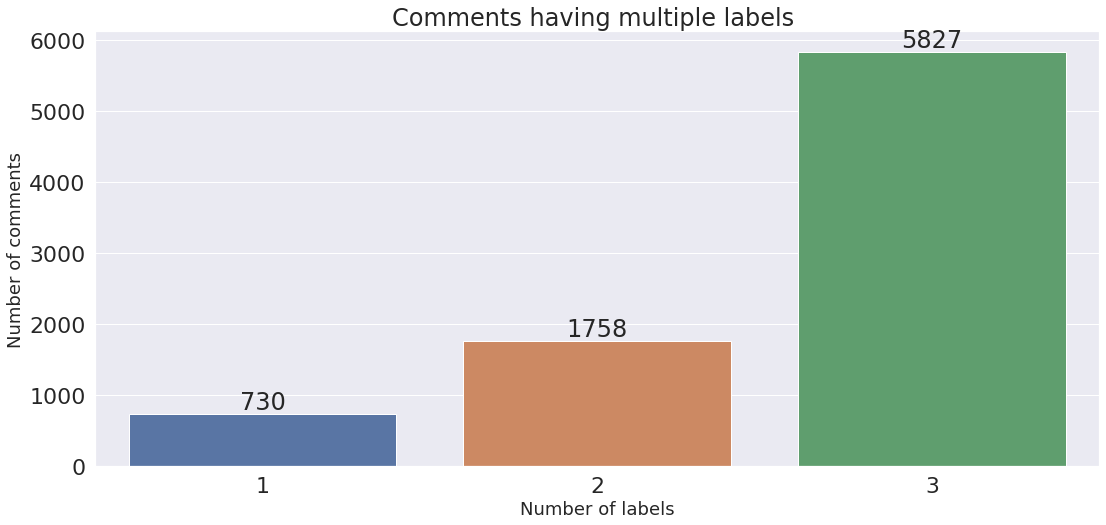

In [14]:
rowSums = df_tags.sum(axis=1)
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize=(18,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values[::-1]# the labels are reversed somehow

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()


# Preprocessing the comment string

https://towardsdatascience.com/how-to-vectorize-text-in-dataframes-for-nlp-tasks-3-simple-techniques-82925a5600db

# TFIDF

TF-IDF stands for term frequency-inverse document frequency. It is a classical method for weighting the word value instead of simply counting it. It is used to determine how important a word is to a text within a collection documents.


TF-IDF is a bag-of-words (BoW) representation of the text that describes the occurrence of words within a text corpus. It doesn’t account for the sequence of the words. I’ll talk more about the limitations in the next section…


too sparse, low co-occurance, not ideal, 
max features
word embedding better, to train rnn, 
doc2 vec -> logistic 
or try word count

logistic regression, penalty, class-weight


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

train = df1.rComments

countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)

count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()

df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

      000  01  010  10  100  ...  zoonotics  zullo  zupanc  zybook  zybooks
0       0   0    0   0    0  ...          0      0       0       0        0
1       0   0    0   0    0  ...          0      0       0       0        0
2       0   0    0   0    0  ...          0      0       0       0        0
3       0   0    0   0    0  ...          0      0       0       0        0
4       0   0    0   0    0  ...          0      0       0       0        0
...   ...  ..  ...  ..  ...  ...        ...    ...     ...     ...      ...
8310    0   0    0   0    0  ...          0      0       1       0        0
8311    0   0    0   0    0  ...          0      0       0       0        0
8312    0   0    0   0    0  ...          0      0       0       0        0
8313    0   0    0   0    0  ...          0      0       0       0        0
8314    0   0    0   0    0  ...          0      0       0       0        0

[8315 rows x 9543 columns]

TD-IDF Vectorizer

      000   01  010   

#Logistic Regression

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

  The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).


Accuracy:  0.7373737373737373
F1 score:  0.46259842519685035


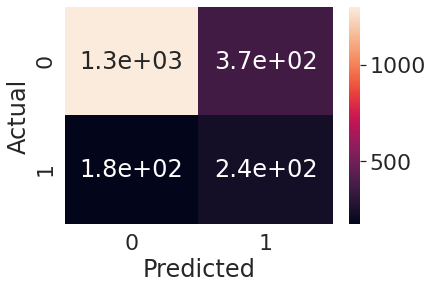

(0.7373737373737373, 0.46259842519685035)

In [18]:
def fit_log_model(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

    logistic_regression= LogisticRegression(class_weight='balanced')
    logistic_regression.fit(X_train,y_train)
    y_pred=logistic_regression.predict(X_test)
    # print(y_test)
    # print()
    # print(y_pred)
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True)

    acc=metrics.accuracy_score(y_test, y_pred)
    f1=metrics.f1_score(y_test, y_pred)
    precision=metrics.precision_recall_curve(y_test,y_pred)
    print('Accuracy: ',acc)
    print('F1 score: ',f1)
    plt.show()
    return (acc,f1)

fit_log_model(df_tfidfvect,df_tags.Caring)

Accessible outside class
Accuracy:  0.7417027417027418
F1 score:  0.32111251580278133


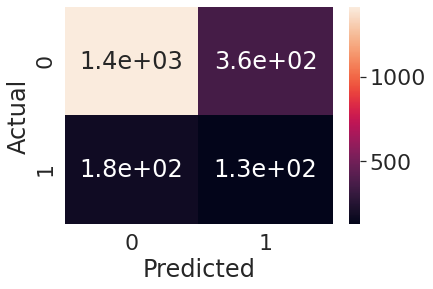

Amazing lectures
Accuracy:  0.759018759018759
F1 score:  0.41676367869615827


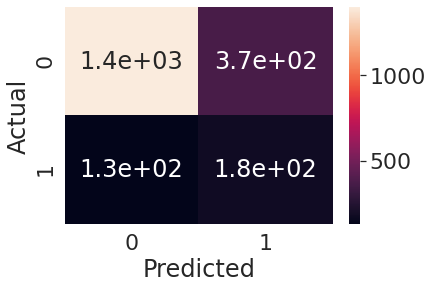

Beware of pop quizzes
Accuracy:  0.9533429533429534
F1 score:  0.2814814814814815


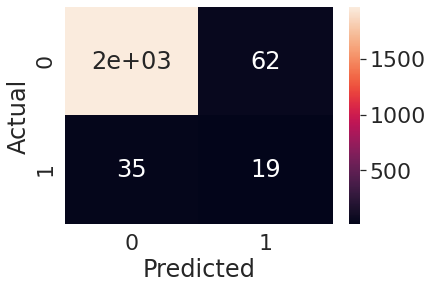

Caring
Accuracy:  0.7373737373737373
F1 score:  0.46259842519685035


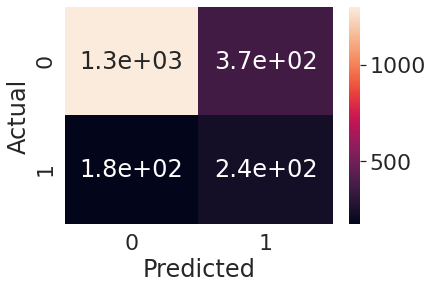

Clear grading criteria
Accuracy:  0.7508417508417509
F1 score:  0.28055555555555556


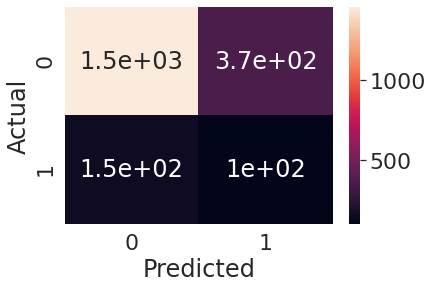

EXTRA CREDIT
Accuracy:  0.8951418951418951
F1 score:  0.22142857142857145


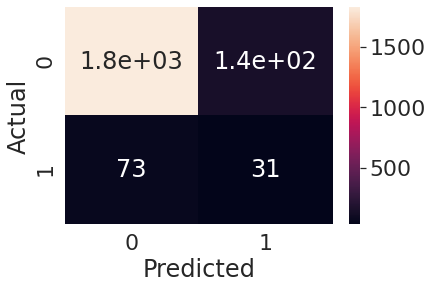

Get ready to read
Accuracy:  0.783068783068783
F1 score:  0.39625167336010714


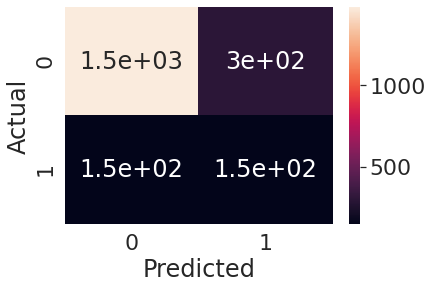

Gives good feedback
Accuracy:  0.7224627224627225
F1 score:  0.4749772520473157


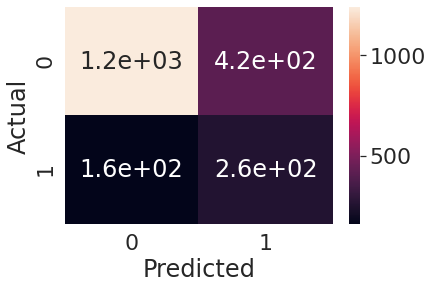

Graded by few things
Accuracy:  0.8114478114478114
F1 score:  0.2547528517110266


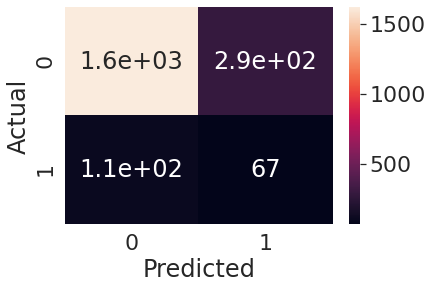

Group projects
Accuracy:  0.8446368446368446
F1 score:  0.3171247357293869


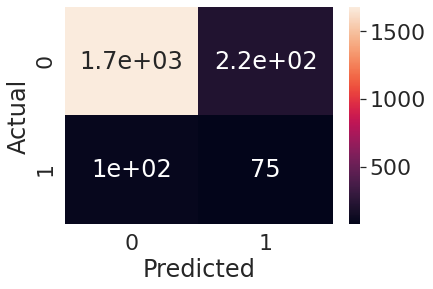

Hilarious
Accuracy:  0.8268398268398268
F1 score:  0.4230769230769231


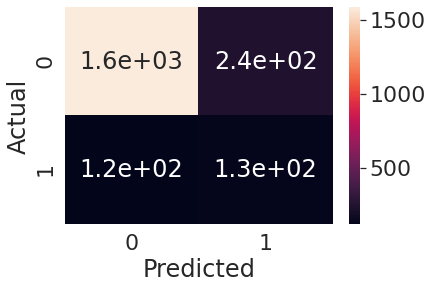

Inspirational
Accuracy:  0.7955747955747956
F1 score:  0.36661698956780925


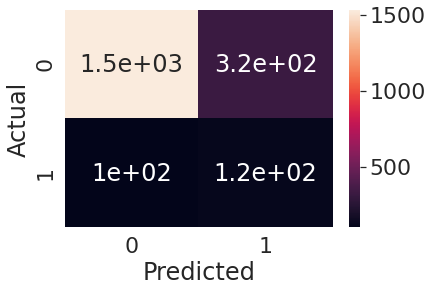

Lecture heavy
Accuracy:  0.7556517556517557
F1 score:  0.3368146214099217


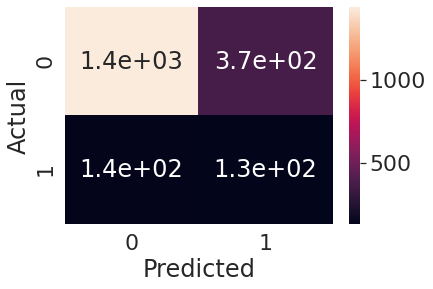

Lots of homework
Accuracy:  0.7566137566137566
F1 score:  0.37376237623762376


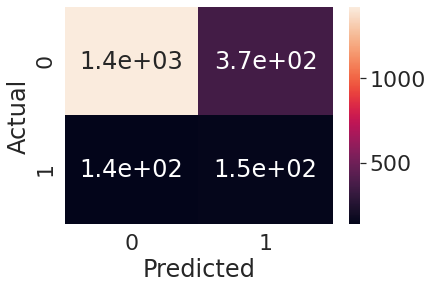

Participation matters
Accuracy:  0.7354497354497355
F1 score:  0.40347071583514105


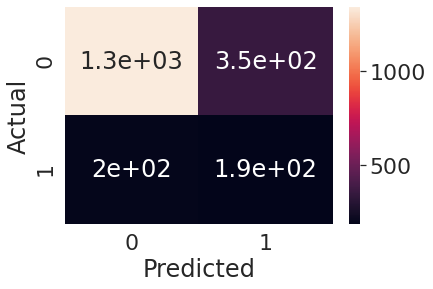

Respected
Accuracy:  0.7046657046657047
F1 score:  0.45855379188712525


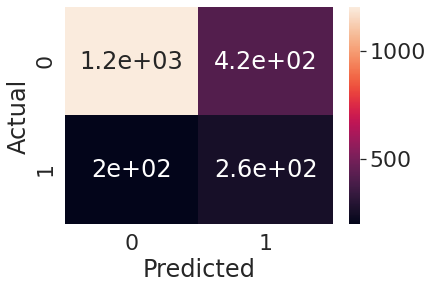

Skip class? You won't pass.
Accuracy:  0.6936026936026936
F1 score:  0.28985507246376807


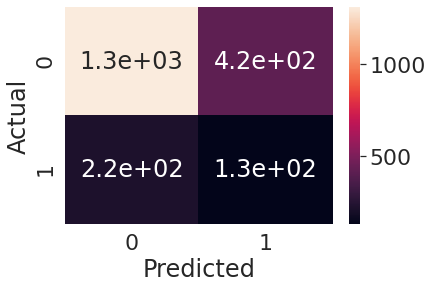

So many papers
Accuracy:  0.9163059163059163
F1 score:  0.17924528301886794


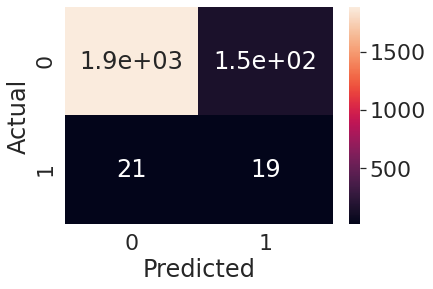

Test heavy
Accuracy:  0.8321308321308322
F1 score:  0.32495164410058025


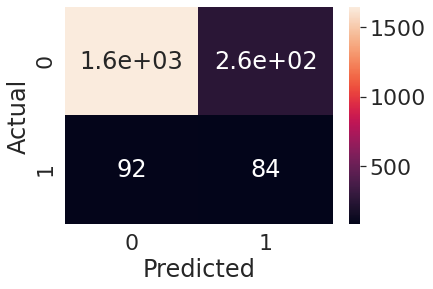

Tough grader
Accuracy:  0.7821067821067821
F1 score:  0.5855443732845379


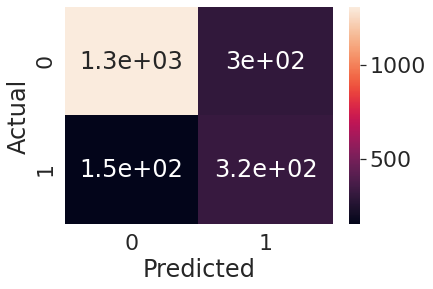

0.5855443732845379


In [19]:
acc_list=[]
f1_list=[]
for col in df_tags:
  print(col)
  acc,f1=fit_log_model(df_tfidfvect,df_tags[col])
  acc_list.append(acc)
  f1_list.append(f1)
print(f1)

Average accuracy: 0.7898989898989899
Average f1-score: 0.3584469265945766


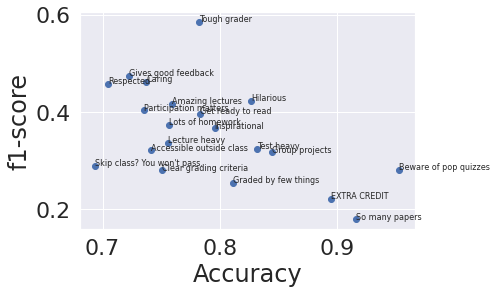

In [20]:
fig, ax = plt.subplots()
ax.scatter(acc_list, f1_list)
plt.xlabel("Accuracy")
plt.ylabel("f1-score")
plt.rcParams.update({'font.size': 8})
for i, txt in enumerate(df_tags.columns):
    ax.annotate(txt, (acc_list[i], f1_list[i]))

print(f'Average accuracy: {sum(acc_list)/len(acc_list)}')
print(f'Average f1-score: {sum(f1_list)/len(f1_list)}')

Reference: 

https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

In [21]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --to PDF "BaseModel.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

# Four Layer Neuron Network

In [22]:
df_tfidfvect.shape

(8315, 9543)

In [24]:
from keras.utils.np_utils import to_categorical

X_train,X_test,y_train,y_test = train_test_split(np.array(df_tfidfvect),np.array(df_tags),test_size=0.25,random_state=0)
X_train,X_test,y_train,y_test = X_train.astype(float), X_test.astype(float), y_train.astype(float), y_test.astype(float)

In [ ]:
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
import time

class DeepNeuralNetwork():
    def __init__(self, sizes, epochs=10, l_rate=0.0001):
        self.sizes = sizes
        self.epochs = epochs
        self.l_rate = l_rate

        # we save all parameters in the neural network in this dictionary
        self.params = self.initialization()

    def sigmoid(self, x, derivative=False):
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))

    def softmax(self, x, derivative=False):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        if derivative:
            return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        return exps / np.sum(exps, axis=0)

    def initialization(self):
        # number of nodes in each layer
        input_layer=self.sizes[0]
        hidden_1=self.sizes[1]
        hidden_2=self.sizes[2]
        output_layer=self.sizes[3]

        params = {
            'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

        return params

    def forward_pass(self, x_train):
        params = self.params

        # input layer activations becomes sample
        params['A0'] = x_train

        # input layer to hidden layer 1
        params['Z1'] = np.dot(params["W1"], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        # hidden layer 1 to hidden layer 2
        params['Z2'] = np.dot(params["W2"], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        # hidden layer 2 to output layer
        params['Z3'] = np.dot(params["W3"], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']

    def backward_pass(self, y_train, output):
        '''
            This is the backpropagation algorithm, for calculating the updates
            of the neural network's parameters.

            Note: There is a stability issue that causes warnings. This is 
                  caused  by the dot and multiply operations on the huge arrays.
                  
                  RuntimeWarning: invalid value encountered in true_divide
                  RuntimeWarning: overflow encountered in exp
                  RuntimeWarning: overflow encountered in square
        '''
        params = self.params
        change_w = {}

        # Calculate W3 update
        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])

        # Calculate W2 update
        error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])

        # Calculate W1 update
        error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w

    def update_network_parameters(self, changes_to_w):
        '''
            Update network parameters according to update rule from
            Stochastic Gradient Descent.

            θ = θ - η * ∇J(x, y), 
                theta θ:            a network parameter (e.g. a weight w)
                eta η:              the learning rate
                gradient ∇J(x, y):  the gradient of the objective function,
                                    i.e. the change for a specific theta θ
        '''
        
        for key, value in changes_to_w.items():
            self.params[key] -= self.l_rate * value

    def compute_accuracy(self, x_val, y_val):
        '''
            This function does a forward pass of x, then checks if the indices
            of the maximum value in the output equals the indices in the label
            y. Then it sums over each prediction and calculates the accuracy.
        '''
        predictions = []

        for x, y in zip(x_val, y_val):
            val = 0.05
            acc = 0
            output = self.forward_pass(x)
            output = output > 0.5
            for i in range(20):
              if (output[i] == y[i]):
                acc += val
        predictions.append(acc)
            # pred = np.argmax(output)
            # predictions.append(pred in np.where(y == 1).any())
        
        return np.mean(predictions)
        #return (len(predictions) - sum(predictions))/len(predictions)

    def train(self, x_train, y_train, x_val, y_val):
        start_time = time.time()
        for iteration in range(self.epochs):
            for x,y in zip(x_train, y_train):
                output = self.forward_pass(x)
                changes_to_w = self.backward_pass(y, output)
                self.update_network_parameters(changes_to_w)
            
            accuracy = self.compute_accuracy(x_val, y_val)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
                iteration+1, time.time() - start_time, accuracy * 100
            ))
            
dnn = DeepNeuralNetwork(sizes=[9543, 128, 24, 20])
dnn.train(X_train, y_train, X_test, y_test)

Epoch: 1, Time Spent: 60.02s, Accuracy: 85.00%
Epoch: 2, Time Spent: 116.02s, Accuracy: 85.00%
Epoch: 3, Time Spent: 207.89s, Accuracy: 85.00%


In [ ]:
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab

tokenizer = get_tokenizer('basic_english')
tokenizer

<function torchtext.data.utils._basic_english_normalize>